# Semi-Supervised VAE Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! cp drive/MyDrive/DeepLearning/code/*.py .

## By VAEGen

### Imports

In [3]:
from plotting import plot_64, plot_64_m2, plot_loss_m1 ,plot_loss_m2, make_cm,  plot_interpolation_m1, plot_interpolation_m2
from models import VAE, M1, M2
from training import run_epochs
from datasets import importMNIST, importFashionMNIST
from loaders import create_loader, create_subset
from classifiers import kneighbors_classifier
import torch

## Meta settings and init values

In [4]:
#Meta settings
dataset="mnist" #("mnist"/"fashion")
batch_size = 512
epochs = 15
latent_dim = 8
learning_rate = 1e-3
image_channels = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)
## Initial Values
model = None
dset_train = None
dset_test = None
train_loss = []
train_acc = []
test_loss = []
test_acc = []


In [5]:
## Importing Dataset
if dataset=="mnist":
    dset_train, dset_test = importMNIST()
elif dataset=="fashion":
    dset_train, dset_test = importFashionMNIST()

## Creating Loaders
train_loader = create_loader(dset_train,batch_size)
test_loader = create_loader(dset_test,batch_size)    

## Binarized Datasets
### 2.1.4 (Report)
Plot 64 randomly chosen binarized MNIST samples on a 8 × 8 grid

Plotting non-binarized



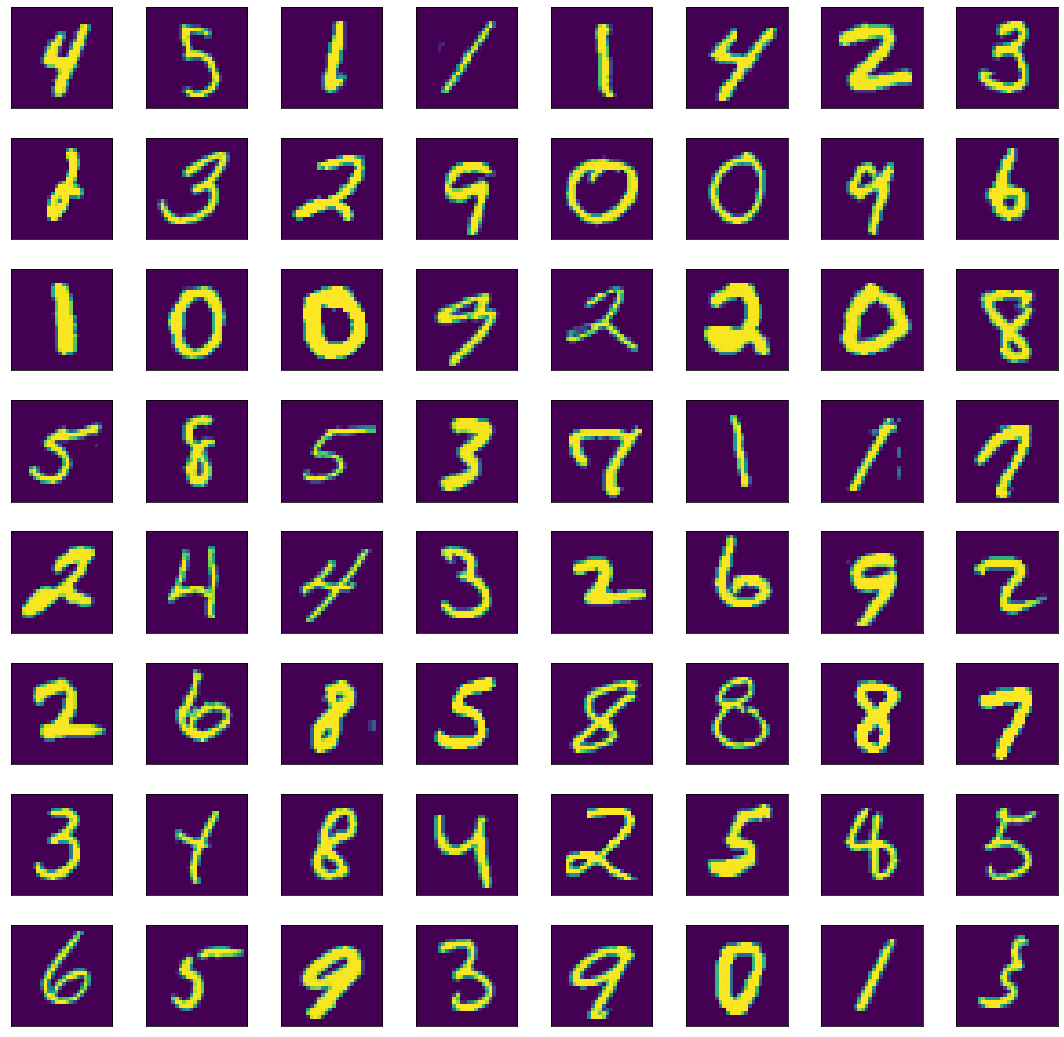

Plotting binarized


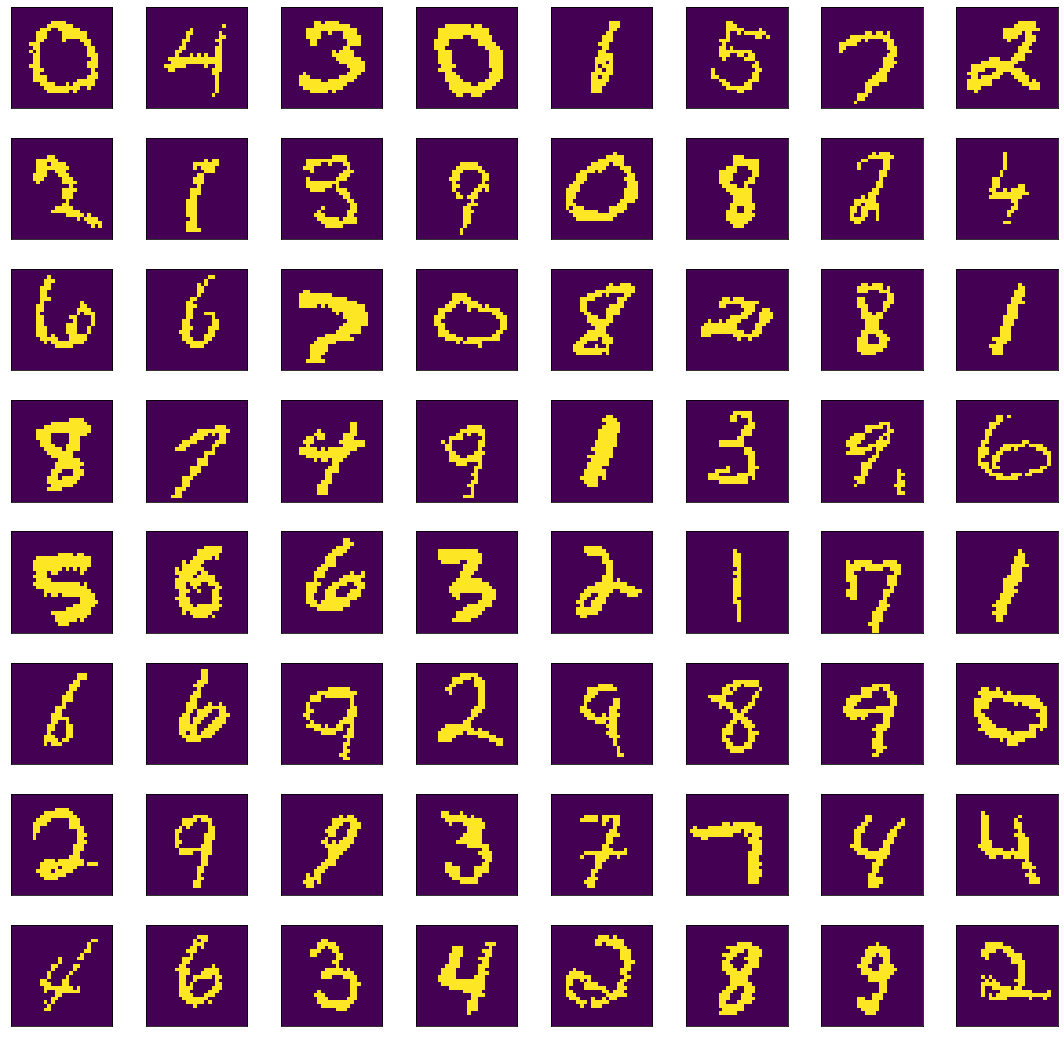

In [ ]:
examples = enumerate(train_loader)

# Plot non-binarized
print("Plotting non-binarized")
plot_64(batch=examples)

dset_bin=None

if dataset=="mnist":
    dset_bin, _ = importMNIST(binarized=True)
    
if dataset=="fashion":
    dset_bin, _ = importFashionMNIST(binarized=True)

bin_loader = create_loader(dset_bin,batch_size)

examples = enumerate(bin_loader)
    
print("Plotting binarized")
plot_64(batch=examples)

## VAE

In [ ]:
# define model and optimizer
mode = "vae"
model = VAE(model, image_channels=image_channels,h_dim=1024,z_dim=8).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### 2.2.2 (Report) 
Generate 64 samples from the untrained model and plot them on a 8 × 8 grid.

Sampling before training


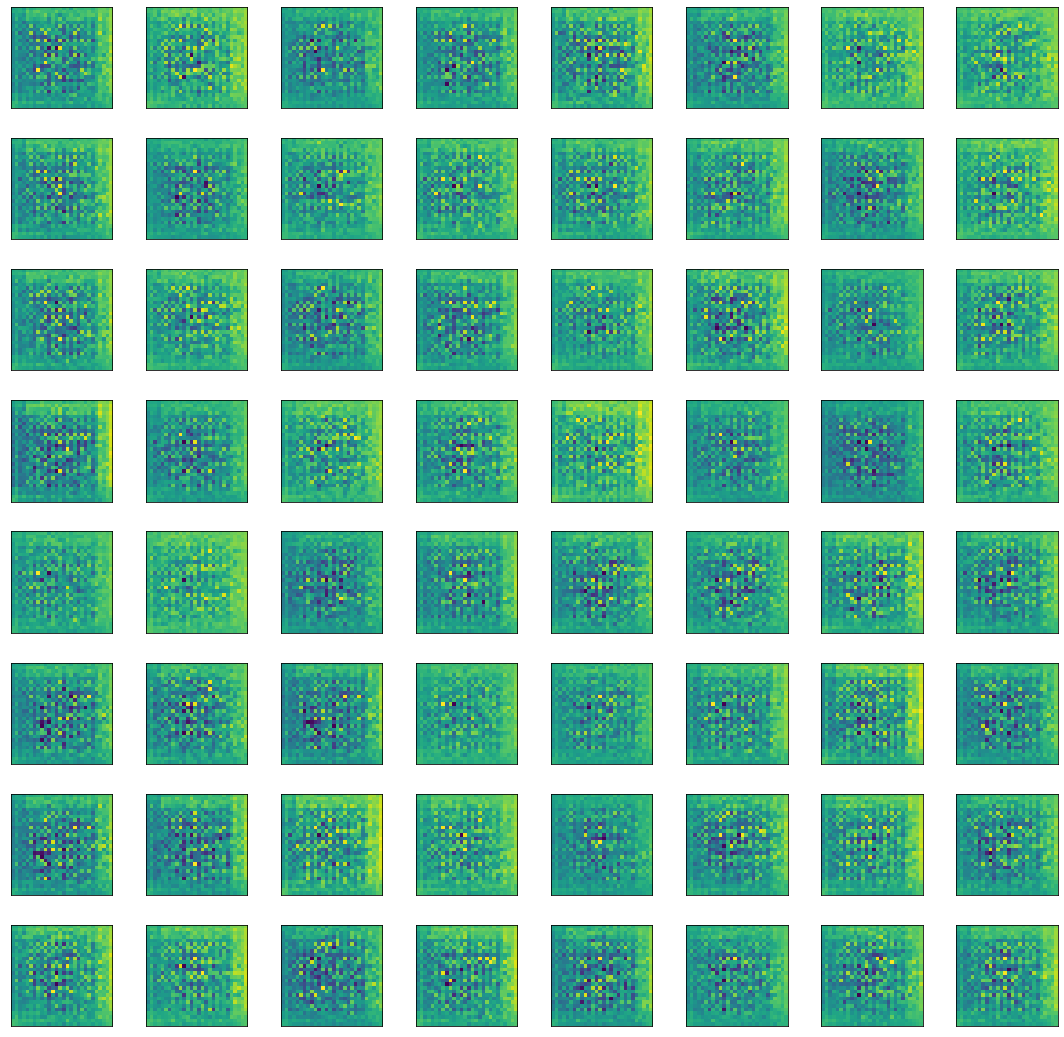

In [ ]:
# Sample before training
print("Sampling before training")
plot_64(model=model, sample=True)

In [ ]:
# Train network
run_epochs(mode, model, optimizer, epochs, train_loader, test_loader)


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch[1/3] Loss: 536.790 536.790 0.000


KeyboardInterrupt: ignored

### 2.2.4 (Report) 
Generate 64 samples from the trained model and plot them on a 8 × 8 grid.

In [ ]:
# Sample after training
print("Sampling after training")
plot_64(model=model, sample=True)

### 2.2.5 (Report)
Evaluate the trained model on the test set and report the number.

In [ ]:
batch_idx, (example_data, example_targets) = next(examples)

model.eval
recon_images, mu, logvar = model(example_data.to(device),example_targets)
loss, bce, kld = model.loss_fn(recon_images, example_data, mu, logvar)
to_print = "Loss: {:.3f} {:.3f} {:.3f}".format(loss.data.cpu().numpy().tolist()/batch_size, bce.data.cpu().numpy().tolist()/batch_size, kld.data.cpu().numpy().tolist()/batch_size)
print(to_print)

Loss: 79.658 79.644 0.014


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## M1

In [ ]:
epochs = 15
train_loss = []
train_acc = []
test_loss = []
test_acc = []


Epoch 1 of 15
	 Training ...


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


	 Testing ...
Train ELBO: -222.7377
Val ELBO: -157.1452
Epoch 2 of 15
	 Training ...
	 Testing ...
Train ELBO: -129.0777
Val ELBO: -105.0963
Epoch 3 of 15
	 Training ...
	 Testing ...
Train ELBO: -105.2884
Val ELBO: -95.7315
Epoch 4 of 15
	 Training ...
	 Testing ...
Train ELBO: -98.3805
Val ELBO: -90.9612
Epoch 5 of 15
	 Training ...
	 Testing ...
Train ELBO: -94.5349
Val ELBO: -89.1448
Epoch 6 of 15
	 Training ...
	 Testing ...
Train ELBO: -92.1045
Val ELBO: -87.2409
Epoch 7 of 15
	 Training ...
	 Testing ...
Train ELBO: -90.5127
Val ELBO: -86.4884
Epoch 8 of 15
	 Training ...
	 Testing ...
Train ELBO: -89.1185
Val ELBO: -84.5964
Epoch 9 of 15
	 Training ...
	 Testing ...
Train ELBO: -87.8667
Val ELBO: -83.3432
Epoch 10 of 15
	 Training ...
	 Testing ...
Train ELBO: -86.9142
Val ELBO: -83.7622
Epoch 11 of 15
	 Training ...
	 Testing ...
Train ELBO: -86.0293
Val ELBO: -82.9636
Epoch 12 of 15
	 Training ...
	 Testing ...
Train ELBO: -85.3113
Val ELBO: -82.3093
Epoch 13 of 15
	 Training

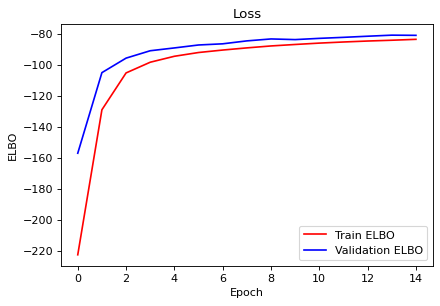

In [ ]:
# define model and optimizer
mode = "m1"
model = M1(device, image_channels=1, h_dim=1024, z_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train network
train_loss,test_loss = run_epochs(mode, model, optimizer, epochs, train_loader, test_loader, train_loss, test_loss)

# plot loss
plot_loss_m1(train_loss,test_loss)


### 2.3.2 (Report)
Train a classifier on their latent representation. First try a linear classifier and then
experiment with other types of classifiers. Report the accuracies.




In [ ]:
# linear classifier
return # todo


Mean acc (train):  0.9
Mean acc (test):  0.77


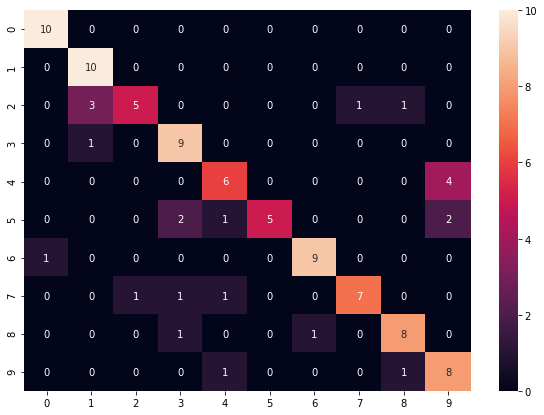

In [ ]:
# classifier
kneighbors_classifier(model,dset_train, dset_test, classes)

### Reconstructions and Interpolations

In [ ]:
# plot reconstructions
plot_64(model=model,sample=True)

# sample model and plot interpolations
z_in=model.sample(batch_size=10000,z_out=True)
plot_interpolation_m1(model, z_in=z_in,image_n=0,latent_dim=latent_dim,imsize=28,interpolate_dim=18,std_=3,batch_size=10000)




### 2.3.3 (Report)
Implement some simple baselines: Train a linear classifier or neural network from
scratch using *only* the 100 labeled data points. Report the accuracies.

In [ ]:
#Subset of data with 10 samples from each category.
train_subset_loader = create_subset(dset_train,batch_size)
test_subset_loader = create_subset(dset_test,batch_size)

train_loss = []
train_acc = []
test_loss = []
test_acc = []

Epoch 1 of 100
	 Training ...


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


	 Testing ...
Train ELBO: -551.7404
Val ELBO: -518.9221
Epoch 2 of 100
	 Training ...
	 Testing ...
Train ELBO: -507.3768
Val ELBO: -460.0403
Epoch 3 of 100
	 Training ...
	 Testing ...
Train ELBO: -446.7314
Val ELBO: -387.8393
Epoch 4 of 100
	 Training ...
	 Testing ...
Train ELBO: -375.1840
Val ELBO: -318.5357
Epoch 5 of 100
	 Training ...
	 Testing ...
Train ELBO: -317.4510
Val ELBO: -275.8962
Epoch 6 of 100
	 Training ...
	 Testing ...
Train ELBO: -278.4372
Val ELBO: -250.8521
Epoch 7 of 100
	 Training ...
	 Testing ...
Train ELBO: -252.1578
Val ELBO: -235.1738
Epoch 8 of 100
	 Training ...
	 Testing ...
Train ELBO: -234.7243
Val ELBO: -225.4291
Epoch 9 of 100
	 Training ...
	 Testing ...
Train ELBO: -225.2272
Val ELBO: -218.8977
Epoch 10 of 100
	 Training ...
	 Testing ...
Train ELBO: -219.8370
Val ELBO: -213.0996
Epoch 11 of 100
	 Training ...
	 Testing ...
Train ELBO: -215.7049
Val ELBO: -210.6251
Epoch 12 of 100
	 Training ...
	 Testing ...
Train ELBO: -213.8198
Val ELBO: -208.

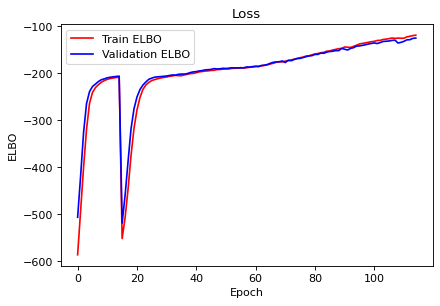

Mean acc (train):  0.87
Mean acc (test):  0.57


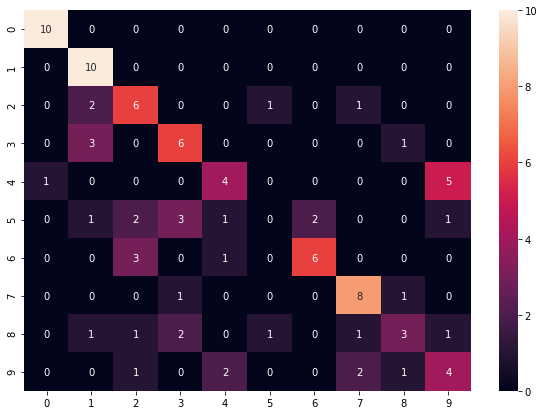

In [ ]:
epochs = 100

# define model and optimizer
mode = "m1"
model = M1(device, image_channels=1, h_dim=1024, z_dim=latent_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train network
train_loss,test_loss = run_epochs(mode, model, optimizer, epochs, train_subset_loader, test_subset_loader, train_loss, test_loss)

# plot loss
plot_loss_m1(train_loss,test_loss)

# classifier
kneighbors_classifier(model,dset_train, dset_test, classes)



## M2

In [6]:
epochs = 25
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [7]:
# define model and optimizer
mode = "m2"
model = M2(device, image_channels=image_channels, h_dim=1024, z_dim=latent_dim, num_labels=num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
# train network full dataset
#train_loss, test_loss, train_acc, test_acc = run_epochs(mode, model, optimizer, epochs, train_loader, test_loader, train_loss, test_loss, train_acc, test_acc)

### 2.4.2 (Report) 
Train the model for the same number of epochs as the VAE earlier. Report the
accuracy.

In [8]:
# train network
train_loss, test_loss, train_acc, test_acc = run_epochs(mode, model, optimizer, epochs, train_loader, test_loader, train_loss, test_loss, train_acc, test_acc)

Epoch 1 of 25
	 Training ...


KeyboardInterrupt: ignored

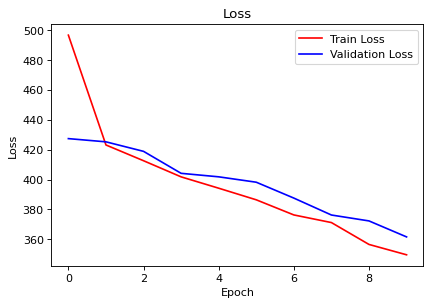

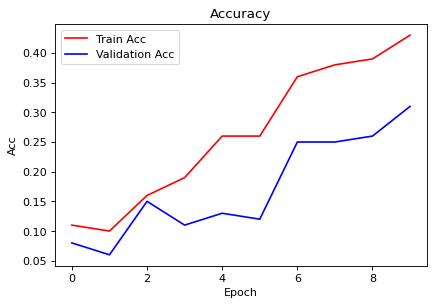

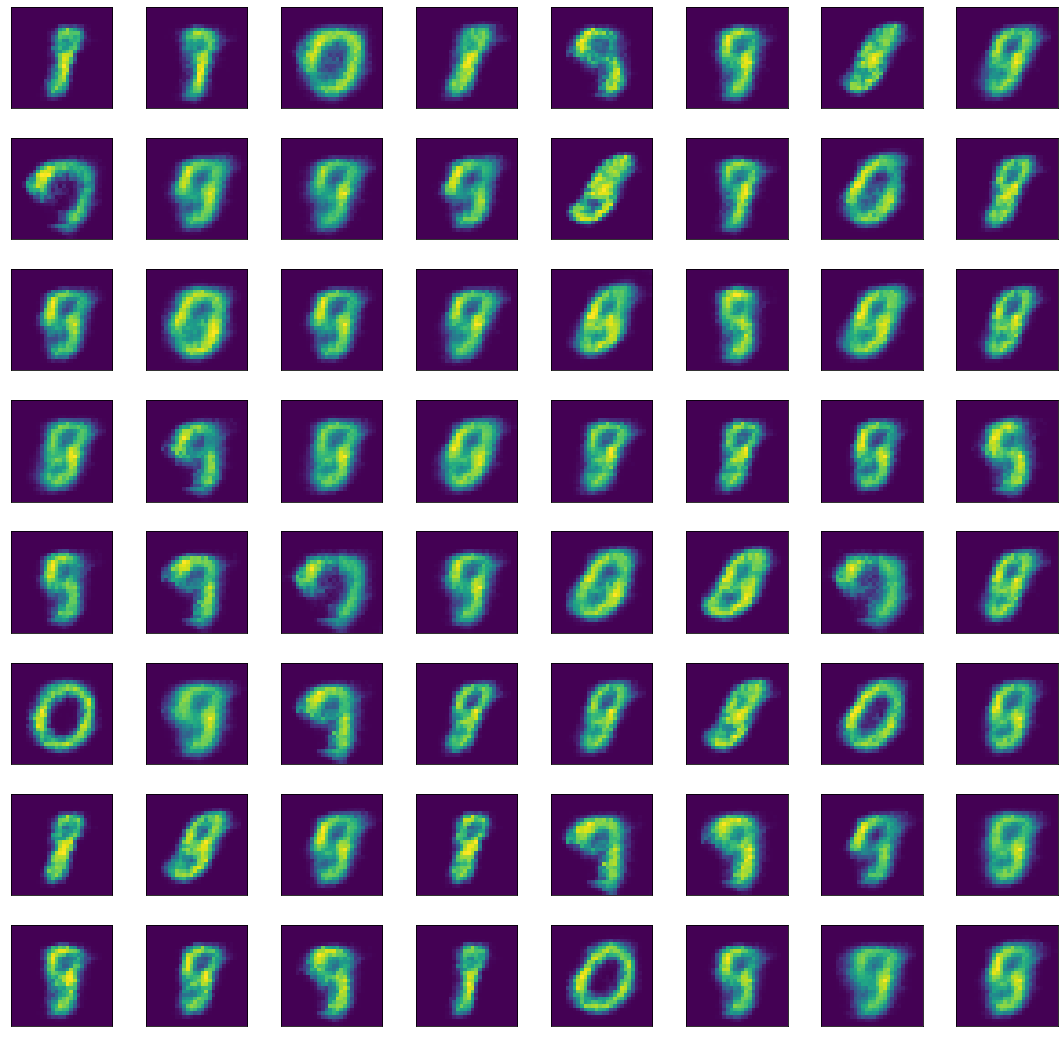

In [ ]:
# plot loss
plot_loss_m2(train_loss,test_loss, train_acc, test_acc)

# plot reconstructions
plot_64_m2(model=model, sample=True, y=(torch.ones(64).type(torch.int64)*9))

Mean acc (train):  0.43


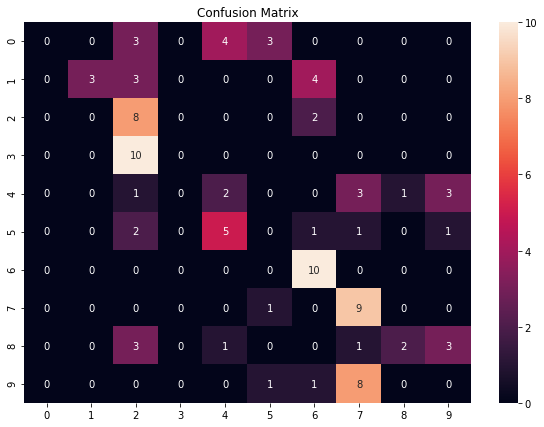

Mean acc (val):  0.31


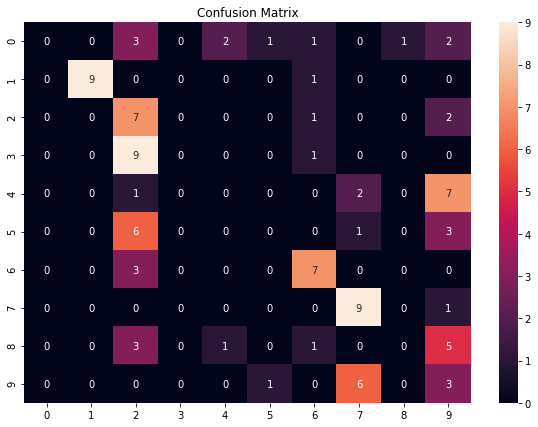

In [ ]:
# confusion_matrixes
print("Mean acc (train): ", train_acc[-1])
make_cm(model, dset_train)
print("Mean acc (val): ", test_acc[-1])
make_cm(model, dset_test)

### Sample and interpolations

In [ ]:
# sample model and plot interpolations
z_in = model.sample(y=torch.Tensor([0,1,2,3,4,5,6,7,8,9]).type(torch.int64))["z"]
plot_interpolation_m2(model, z_in=z_in,image_n=0,latent_dim=latent_dim,imsize=28,interpolate_dim=18,std_=5,batch_size=10000)


TypeError: ignored